<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/RNA_para_modelo_de_Nathalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Este código tem o objetivo de desevolver uma rede neural artificial para prever o COV, da simulação que Nathália fará para o MecomPE

---
O primeiro passo é importar as bibliotecas mais importantes

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.metrics import MeanRelativeError

Também é necessário importar os dados gerados na simulação, já que vão servir de base para treino e para validação da rede neural.

In [ ]:
tf.random.set_seed(1)

In [ ]:
#Carregando o dataset e separando em teste e treino - Aqui tudo varia até ter a base da simulação corretamente
df = pd.read_csv('data_cov (1).csv') #Alterar o nome
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:86], x[86:]
y_treino, y_teste = y[0:86], y[86:]

#Normalizando os dados de treino, pois ajuda no treino (uma vez que as funções de ativação tendem entre -1 e 1)
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [ ]:
def modelo_RNA(x, funcao, nos, camadas_ocultas):
  modelo = Sequential()
  modelo.add(tf.keras.layers.Input(shape=(x.shape[1],)))
  #modelo.add(keras.layers.Dense(nos, activation='relu', input_shape=x.shape))
  for i in range(camadas_ocultas):
    modelo.add(keras.layers.Dense(nos, activation=funcao))
    modelo.add(keras.layers.Dropout(0.2))
  modelo.add(keras.layers.Dense(1, activation= 'linear'))

  return modelo

def treino_modelo(modelo, optimizer, loss, metrics, x_treino, y_treino, x_teste, y_teste, itr):
  modelo.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  resultado = modelo.fit(x_treino, y_treino, epochs=itr, batch_size=5, validation_data=(x_teste, y_teste))

  return resultado, modelo

def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

Testar o desempenho da rede com diversos nós e camadas ocultas.

A etapa é do seguinte modo:


*   Fixar o número de neurônios ocultos em 10;
*   Variar a taxa de camadas oculta entre 2 e 20.



In [ ]:
#Analisando os valores dos erros para a variação do número de camadas
loss = []
val_loss = []
mae = []
val_mae = []
erro_relativo_valor = []
a = []
resultados = list()
for i in range (2, 20):
  otimizador = tf.keras.optimizers.Adam(learning_rate=0.001)
  nos = 10
  modelo = modelo_RNA(x_treino, 'linear', nos, i)
  resultado, modelo = treino_modelo(modelo, otimizador, 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)
  resultado = pd.DataFrame(resultado.history)
  resultados.append(resultado)
  y_pred = modelo.predict(x_treino)
  y_pred = pd.DataFrame(y_pred)
  erro = erro_relativo(y_pred, y_treino)
  erro_relativo_valor.append(erro)

Epoch 1/350
18/18 [==============================] - 1s 16ms/step - loss: 32583.9297 - mae: 147.2822 - val_loss: 2519.7981 - val_mae: 50.1545
Epoch 2/350
18/18 [==============================] - 0s 5ms/step - loss: 25109.6738 - mae: 125.5408 - val_loss: 51.9387 - val_mae: 6.8183
Epoch 3/350
18/18 [==============================] - 0s 5ms/step - loss: 12599.8418 - mae: 89.7339 - val_loss: 272.2388 - val_mae: 16.3411
Epoch 4/350
18/18 [==============================] - 0s 7ms/step - loss: 12560.8818 - mae: 92.2927 - val_loss: 552.4178 - val_mae: 23.3980
Epoch 5/350
18/18 [==============================] - 0s 7ms/step - loss: 13699.0986 - mae: 97.8502 - val_loss: 867.6753 - val_mae: 29.3770
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 10150.0205 - mae: 79.8952 - val_loss: 879.4528 - val_mae: 29.5846
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 7612.4497 - mae: 68.9957 - val_loss: 808.8491 - val_mae: 28.3714
Epoch 8/350
18/18 [=======

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 2s 18ms/step - loss: 22850.5430 - mae: 120.6428 - val_loss: 643.7390 - val_mae: 25.1904
Epoch 2/350
18/18 [==============================] - 0s 5ms/step - loss: 17426.0898 - mae: 109.2404 - val_loss: 1607.7864 - val_mae: 40.0026
Epoch 3/350
18/18 [==============================] - 0s 5ms/step - loss: 16335.3604 - mae: 104.8631 - val_loss: 1820.6947 - val_mae: 42.6018
Epoch 4/350
18/18 [==============================] - 0s 4ms/step - loss: 8618.2402 - mae: 76.8418 - val_loss: 1797.4242 - val_mae: 42.3408
Epoch 5/350
18/18 [==============================] - 0s 5ms/step - loss: 7944.9863 - mae: 72.0926 - val_loss: 775.3118 - val_mae: 27.7776
Epoch 6/350
18/18 [==============================] - 0s 5ms/step - loss: 7033.4463 - mae: 69.9824 - val_loss: 780.7406 - val_mae: 27.8888
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 5276.9639 - mae: 60.2530 - val_loss: 773.6896 - val_mae: 27.7762
Epoch 8/350
18/18 [=====

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 2s 16ms/step - loss: 6999.0298 - mae: 58.4255 - val_loss: 21.0849 - val_mae: 4.5824
Epoch 2/350
18/18 [==============================] - 0s 4ms/step - loss: 3635.4507 - mae: 48.7540 - val_loss: 1.8732 - val_mae: 1.3573
Epoch 3/350
18/18 [==============================] - 0s 5ms/step - loss: 3779.3066 - mae: 44.6926 - val_loss: 10.3157 - val_mae: 3.2117
Epoch 4/350
18/18 [==============================] - 0s 6ms/step - loss: 1412.5963 - mae: 30.2137 - val_loss: 1.7931 - val_mae: 1.3359
Epoch 5/350
18/18 [==============================] - 0s 5ms/step - loss: 1414.3691 - mae: 29.0854 - val_loss: 0.2592 - val_mae: 0.4878
Epoch 6/350
18/18 [==============================] - 0s 4ms/step - loss: 1636.9493 - mae: 30.1422 - val_loss: 0.3888 - val_mae: 0.6056
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 2112.5398 - mae: 30.6253 - val_loss: 2.7522 - val_mae: 1.6509
Epoch 8/350
18/18 [==============================] -

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 2s 17ms/step - loss: 60798.1992 - mae: 191.1648 - val_loss: 2948.2603 - val_mae: 54.2887
Epoch 2/350
18/18 [==============================] - 0s 5ms/step - loss: 61215.8008 - mae: 189.2104 - val_loss: 786.8486 - val_mae: 28.0380
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 28107.6367 - mae: 131.5083 - val_loss: 138.1680 - val_mae: 11.7336
Epoch 4/350
18/18 [==============================] - 0s 4ms/step - loss: 26718.3105 - mae: 127.7376 - val_loss: 1.2750 - val_mae: 0.9623
Epoch 5/350
18/18 [==============================] - 0s 5ms/step - loss: 18299.4629 - mae: 103.6141 - val_loss: 35.2144 - val_mae: 5.9099
Epoch 6/350
18/18 [==============================] - 0s 4ms/step - loss: 17283.8613 - mae: 107.9276 - val_loss: 93.9996 - val_mae: 9.6820
Epoch 7/350
18/18 [==============================] - 0s 4ms/step - loss: 15349.9434 - mae: 95.8181 - val_loss: 214.4268 - val_mae: 14.6344
Epoch 8/350
18/18 [=======

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 3s 24ms/step - loss: 30173.7012 - mae: 140.3144 - val_loss: 791.5702 - val_mae: 28.1329
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 20078.0996 - mae: 110.9805 - val_loss: 469.8820 - val_mae: 21.6729
Epoch 3/350
18/18 [==============================] - 0s 8ms/step - loss: 15361.8848 - mae: 94.9739 - val_loss: 107.2746 - val_mae: 10.3484
Epoch 4/350
18/18 [==============================] - 0s 6ms/step - loss: 13151.1250 - mae: 81.6084 - val_loss: 2.9489 - val_mae: 1.6980
Epoch 5/350
18/18 [==============================] - 0s 7ms/step - loss: 5031.3633 - mae: 53.7038 - val_loss: 3.0565 - val_mae: 1.7438
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 4593.2314 - mae: 53.5856 - val_loss: 2.8681 - val_mae: 1.6915
Epoch 7/350
18/18 [==============================] - 0s 7ms/step - loss: 5374.6968 - mae: 53.3676 - val_loss: 4.0344 - val_mae: 2.0055
Epoch 8/350
18/18 [====================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 5s 31ms/step - loss: 54929.5234 - mae: 155.5928 - val_loss: 179.7793 - val_mae: 13.3567
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 23128.6289 - mae: 110.3420 - val_loss: 367.6401 - val_mae: 19.1573
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 19108.2461 - mae: 105.8866 - val_loss: 113.9973 - val_mae: 10.6534
Epoch 4/350
18/18 [==============================] - 0s 5ms/step - loss: 11149.8096 - mae: 75.5316 - val_loss: 23.1174 - val_mae: 4.7602
Epoch 5/350
18/18 [==============================] - 0s 8ms/step - loss: 8730.0811 - mae: 62.4995 - val_loss: 19.8604 - val_mae: 4.4170
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 6225.3501 - mae: 59.7271 - val_loss: 30.4646 - val_mae: 5.4924
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 3723.0498 - mae: 49.5531 - val_loss: 39.0046 - val_mae: 6.2230
Epoch 8/350
18/18 [===============

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 3s 28ms/step - loss: 50758.0117 - mae: 171.2153 - val_loss: 1684.4515 - val_mae: 41.0419
Epoch 2/350
18/18 [==============================] - 0s 9ms/step - loss: 29584.0137 - mae: 116.2795 - val_loss: 1168.8705 - val_mae: 34.1881
Epoch 3/350
18/18 [==============================] - 0s 10ms/step - loss: 15449.7295 - mae: 93.4897 - val_loss: 420.6170 - val_mae: 20.5077
Epoch 4/350
18/18 [==============================] - 0s 9ms/step - loss: 9794.9160 - mae: 72.7363 - val_loss: 133.0196 - val_mae: 11.5325
Epoch 5/350
18/18 [==============================] - 0s 11ms/step - loss: 6133.2666 - mae: 59.5615 - val_loss: 44.7294 - val_mae: 6.6874
Epoch 6/350
18/18 [==============================] - 0s 8ms/step - loss: 7410.4282 - mae: 64.4551 - val_loss: 29.7285 - val_mae: 5.4518
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 6730.4180 - mae: 59.6237 - val_loss: 6.1964 - val_mae: 2.4886
Epoch 8/350
18/18 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 3s 19ms/step - loss: 12994.6963 - mae: 83.9378 - val_loss: 181.1474 - val_mae: 13.4584
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 8328.6953 - mae: 68.8938 - val_loss: 37.8527 - val_mae: 6.1520
Epoch 3/350
18/18 [==============================] - 0s 6ms/step - loss: 4255.3179 - mae: 47.7788 - val_loss: 14.6188 - val_mae: 3.8232
Epoch 4/350
18/18 [==============================] - 0s 6ms/step - loss: 3870.3667 - mae: 44.0373 - val_loss: 6.6961 - val_mae: 2.5876
Epoch 5/350
18/18 [==============================] - 0s 6ms/step - loss: 2250.1843 - mae: 35.7551 - val_loss: 4.9001 - val_mae: 2.2135
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 1750.2562 - mae: 31.7093 - val_loss: 2.4440 - val_mae: 1.5632
Epoch 7/350
18/18 [==============================] - 0s 7ms/step - loss: 1269.9209 - mae: 26.2708 - val_loss: 1.7501 - val_mae: 1.3227
Epoch 8/350
18/18 [=============================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 3s 19ms/step - loss: 25590.0312 - mae: 104.8490 - val_loss: 138.7408 - val_mae: 11.7788
Epoch 2/350
18/18 [==============================] - 0s 6ms/step - loss: 13014.2764 - mae: 84.4833 - val_loss: 25.3720 - val_mae: 5.0370
Epoch 3/350
18/18 [==============================] - 0s 8ms/step - loss: 6194.5474 - mae: 56.0059 - val_loss: 2.7484 - val_mae: 1.6577
Epoch 4/350
18/18 [==============================] - 0s 7ms/step - loss: 5126.3555 - mae: 50.2273 - val_loss: 1.5447 - val_mae: 1.2427
Epoch 5/350
18/18 [==============================] - 0s 6ms/step - loss: 3173.1814 - mae: 41.4862 - val_loss: 0.6529 - val_mae: 0.8075
Epoch 6/350
18/18 [==============================] - 0s 6ms/step - loss: 6037.2578 - mae: 46.6722 - val_loss: 0.0970 - val_mae: 0.3060
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 3056.2148 - mae: 37.9598 - val_loss: 0.2826 - val_mae: 0.5268
Epoch 8/350
18/18 [============================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 3s 20ms/step - loss: 156579.5781 - mae: 232.4765 - val_loss: 871.8410 - val_mae: 29.5205
Epoch 2/350
18/18 [==============================] - 0s 6ms/step - loss: 93567.6250 - mae: 198.7867 - val_loss: 326.5553 - val_mae: 18.0621
Epoch 3/350
18/18 [==============================] - 0s 8ms/step - loss: 77581.2266 - mae: 193.0694 - val_loss: 478.8093 - val_mae: 21.8782
Epoch 4/350
18/18 [==============================] - 0s 5ms/step - loss: 58050.0156 - mae: 163.9253 - val_loss: 350.2843 - val_mae: 18.7134
Epoch 5/350
18/18 [==============================] - 0s 7ms/step - loss: 24019.3555 - mae: 115.6729 - val_loss: 305.9483 - val_mae: 17.4899
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 21165.6270 - mae: 104.8630 - val_loss: 249.6306 - val_mae: 15.7983
Epoch 7/350
18/18 [==============================] - 0s 5ms/step - loss: 16511.5938 - mae: 86.6084 - val_loss: 198.0466 - val_mae: 14.0713
Epoch 8/350
18/18 [

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 4s 26ms/step - loss: 350419.9688 - mae: 372.3943 - val_loss: 11.0121 - val_mae: 3.2833
Epoch 2/350
18/18 [==============================] - 0s 7ms/step - loss: 71171.1328 - mae: 192.5057 - val_loss: 24.9718 - val_mae: 4.9821
Epoch 3/350
18/18 [==============================] - 0s 8ms/step - loss: 83921.2422 - mae: 200.3439 - val_loss: 0.1195 - val_mae: 0.2767
Epoch 4/350
18/18 [==============================] - 0s 7ms/step - loss: 71770.6250 - mae: 159.2798 - val_loss: 11.0213 - val_mae: 3.3157
Epoch 5/350
18/18 [==============================] - 0s 6ms/step - loss: 28720.3203 - mae: 128.3342 - val_loss: 21.6560 - val_mae: 4.6520
Epoch 6/350
18/18 [==============================] - 0s 8ms/step - loss: 18854.9141 - mae: 95.9267 - val_loss: 34.3161 - val_mae: 5.8572
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 22373.4199 - mae: 101.3129 - val_loss: 28.4955 - val_mae: 5.3374
Epoch 8/350
18/18 [===============

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 5s 36ms/step - loss: 350195.9688 - mae: 232.4045 - val_loss: 2357.8254 - val_mae: 48.5424
Epoch 2/350
18/18 [==============================] - 0s 7ms/step - loss: 43687.4648 - mae: 125.4601 - val_loss: 201.2235 - val_mae: 14.1709
Epoch 3/350
18/18 [==============================] - 0s 6ms/step - loss: 27058.6445 - mae: 112.0299 - val_loss: 59.5397 - val_mae: 7.7035
Epoch 4/350
18/18 [==============================] - 0s 7ms/step - loss: 20936.0020 - mae: 92.1701 - val_loss: 28.4559 - val_mae: 5.3249
Epoch 5/350
18/18 [==============================] - 0s 6ms/step - loss: 44634.3008 - mae: 110.0274 - val_loss: 6.9374 - val_mae: 2.6263
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 6131.7427 - mae: 57.4271 - val_loss: 2.0622 - val_mae: 1.4290
Epoch 7/350
18/18 [==============================] - 0s 7ms/step - loss: 14083.4160 - mae: 76.8369 - val_loss: 3.2180 - val_mae: 1.7885
Epoch 8/350
18/18 [===============

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 4s 21ms/step - loss: 140338.9531 - mae: 238.6684 - val_loss: 938.4965 - val_mae: 30.6343
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 60017.6328 - mae: 176.2069 - val_loss: 239.6942 - val_mae: 15.4817
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 48254.7617 - mae: 157.4411 - val_loss: 88.8490 - val_mae: 9.4256
Epoch 4/350
18/18 [==============================] - 0s 8ms/step - loss: 30793.5547 - mae: 107.1720 - val_loss: 22.8993 - val_mae: 4.7848
Epoch 5/350
18/18 [==============================] - 0s 8ms/step - loss: 21477.0117 - mae: 101.0953 - val_loss: 3.0424 - val_mae: 1.7432
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 23411.1113 - mae: 106.5518 - val_loss: 0.7311 - val_mae: 0.8540
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 11307.9473 - mae: 73.3966 - val_loss: 0.0134 - val_mae: 0.1109
Epoch 8/350
18/18 [=============

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 4s 22ms/step - loss: 230900.1875 - mae: 296.4583 - val_loss: 11.2006 - val_mae: 3.3466
Epoch 2/350
18/18 [==============================] - 0s 7ms/step - loss: 129609.6406 - mae: 216.8798 - val_loss: 1.0990 - val_mae: 1.0481
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 70270.1562 - mae: 166.8194 - val_loss: 0.1914 - val_mae: 0.4370
Epoch 4/350
18/18 [==============================] - 0s 8ms/step - loss: 111841.8125 - mae: 185.9967 - val_loss: 16.8146 - val_mae: 4.1005
Epoch 5/350
18/18 [==============================] - 0s 7ms/step - loss: 91200.5469 - mae: 194.2737 - val_loss: 4.5229 - val_mae: 2.1266
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 38051.8672 - mae: 129.6755 - val_loss: 2.8112 - val_mae: 1.6766
Epoch 7/350
18/18 [==============================] - 0s 7ms/step - loss: 25035.9395 - mae: 102.6297 - val_loss: 1.1593 - val_mae: 1.0765
Epoch 8/350
18/18 [================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 4s 21ms/step - loss: 482454.8438 - mae: 444.4157 - val_loss: 3908.1387 - val_mae: 62.5142
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 281439.2812 - mae: 312.6759 - val_loss: 2432.7114 - val_mae: 49.3223
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 128356.8125 - mae: 231.4188 - val_loss: 1121.5701 - val_mae: 33.4898
Epoch 4/350
18/18 [==============================] - 0s 7ms/step - loss: 70217.1641 - mae: 176.9010 - val_loss: 651.3531 - val_mae: 25.5216
Epoch 5/350
18/18 [==============================] - 0s 7ms/step - loss: 112143.4766 - mae: 188.4995 - val_loss: 378.9568 - val_mae: 19.4668
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 31403.2383 - mae: 118.3361 - val_loss: 256.9977 - val_mae: 16.0311
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 34213.5508 - mae: 103.0112 - val_loss: 187.1764 - val_mae: 13.6811
Epoch 8/350


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 5s 33ms/step - loss: 34659.8984 - mae: 115.8141 - val_loss: 27.1651 - val_mae: 5.2114
Epoch 2/350
18/18 [==============================] - 0s 12ms/step - loss: 18956.6777 - mae: 87.8529 - val_loss: 0.0019 - val_mae: 0.0330
Epoch 3/350
18/18 [==============================] - 0s 12ms/step - loss: 10013.0098 - mae: 69.1493 - val_loss: 0.0517 - val_mae: 0.2243
Epoch 4/350
18/18 [==============================] - 0s 8ms/step - loss: 4109.5127 - mae: 44.4570 - val_loss: 0.0620 - val_mae: 0.2465
Epoch 5/350
18/18 [==============================] - 0s 8ms/step - loss: 2621.1582 - mae: 35.6851 - val_loss: 0.1322 - val_mae: 0.3621
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 3607.3186 - mae: 39.7191 - val_loss: 0.0171 - val_mae: 0.1278
Epoch 7/350
18/18 [==============================] - 0s 8ms/step - loss: 2009.1432 - mae: 30.4672 - val_loss: 0.0628 - val_mae: 0.2489
Epoch 8/350
18/18 [============================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 6s 25ms/step - loss: 117251.9062 - mae: 206.5080 - val_loss: 25.3685 - val_mae: 5.0363
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 102121.8984 - mae: 120.9280 - val_loss: 0.9198 - val_mae: 0.9587
Epoch 3/350
18/18 [==============================] - 0s 7ms/step - loss: 18792.3594 - mae: 87.6873 - val_loss: 1.3643 - val_mae: 1.1679
Epoch 4/350
18/18 [==============================] - 0s 9ms/step - loss: 13140.4199 - mae: 82.4970 - val_loss: 1.0562 - val_mae: 1.0275
Epoch 5/350
18/18 [==============================] - 0s 10ms/step - loss: 33665.7109 - mae: 100.9623 - val_loss: 0.8460 - val_mae: 0.9196
Epoch 6/350
18/18 [==============================] - 0s 8ms/step - loss: 13749.2500 - mae: 70.9966 - val_loss: 0.3461 - val_mae: 0.5879
Epoch 7/350
18/18 [==============================] - 0s 8ms/step - loss: 4266.4067 - mae: 44.3633 - val_loss: 0.5428 - val_mae: 0.7365
Epoch 8/350
18/18 [======================

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/350
18/18 [==============================] - 5s 26ms/step - loss: 929629.1875 - mae: 418.9979 - val_loss: 1503.3281 - val_mae: 38.7581
Epoch 2/350
18/18 [==============================] - 0s 8ms/step - loss: 61449.3945 - mae: 171.3550 - val_loss: 195.8048 - val_mae: 13.9755
Epoch 3/350
18/18 [==============================] - 0s 9ms/step - loss: 72030.4922 - mae: 180.6138 - val_loss: 97.2566 - val_mae: 9.8447
Epoch 4/350
18/18 [==============================] - 0s 9ms/step - loss: 126090.2578 - mae: 193.6460 - val_loss: 58.0069 - val_mae: 7.6026
Epoch 5/350
18/18 [==============================] - 0s 9ms/step - loss: 82377.1250 - mae: 166.3386 - val_loss: 93.9404 - val_mae: 9.6841
Epoch 6/350
18/18 [==============================] - 0s 7ms/step - loss: 137901.6875 - mae: 160.3162 - val_loss: 107.8637 - val_mae: 10.3809
Epoch 7/350
18/18 [==============================] - 0s 9ms/step - loss: 23631.0215 - mae: 104.1047 - val_loss: 100.4336 - val_mae: 10.0180
Epoch 8/350
18/18 [==

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Plotando o gráfico

In [ ]:
a = []
for i in range (2,20):
  a.append(i)

In [ ]:
erro_relativo_valor[]

0     0.669278
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
81         NaN
82         NaN
83         NaN
84         NaN
85         NaN
Length: 86, dtype: float64

ValueError: x and y must be the same size

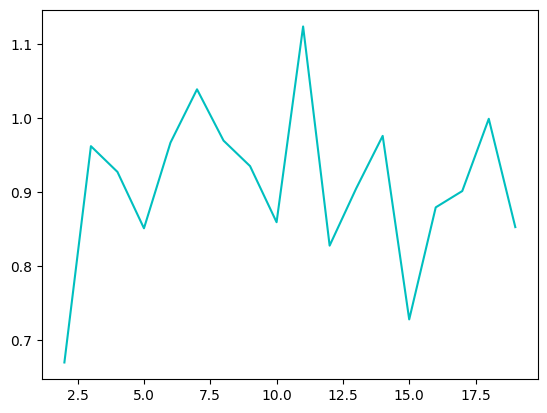

In [ ]:
#Plotando o gráfico com os erros

plt.plot(a, erro_relativo_valor, c='c')
plt.scatter(a, erro_relativo_valor, marker='x', c='r', label = 'Pontos')
plt.title('Evolução do erro relativo em relação ao número de camadas ocultas')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['Erro Relativo'])
plt.show()
print(erro_relativo)

Para ver o desempenho da rede neural conforme as funções de ativação e taxa de aprendizado

In [ ]:
funcoes = ['tanh', 'relu', 'sigmoid', 'LeakyReLU']
taxas = [0.005, 0.01, 0.05]